In [6]:
# Ashraf Dasa (AYDASA@UAB.EDU)

In [213]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

"""
1. Data Preprocessing: 
    • Load the dataset and perform initial exploratory data analysis. 
    • Handle null values appropriately (e.g., using imputation or removal). 
    • Convert categorical variables to a suitable numerical format. 
    • Encode the target variable 'Segmentation' for the classification task. 
"""

In [2]:
data_df_train = pd.read_csv("train.csv")
data_df_train["dataSource"] = "train"
data_df_original_train = data_df_train
data_df_train.head()

data_df_test = pd.read_csv("test.csv")
data_df_test["dataSource"] = "test"
data_df_test["Segmentation"] = "A" # jsut a place holder, will be ignored
data_df_original_test = data_df_test
data_df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,dataSource,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,test,A
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,test,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,test,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,test,A
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,test,A


In [487]:
data_df = pd.concat([data_df_train,data_df_test])
data_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,dataSource
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,A,test
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A,test
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,A,test
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,A,test


In [488]:
data_df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [489]:
# number of nuls per each column
data_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dataSource            0
dtype: int64

In [490]:
data_df['Work_Experience'].fillna(-1, inplace=True)
bins= [-1, 0, 3, 6, 9, 12, 15]
labels = [6, 5, 4, 3, 2, 1]
data_df['Work_Experience'] = pd.cut(data_df['Work_Experience'], bins=bins, labels=labels, right=False)
data_df['Work_Experience'].value_counts()

Work_Experience
5    6587
3    1133
6    1098
4     953
2     741
1     183
Name: count, dtype: int64

In [491]:
data_df['Ever_Married'].fillna('na', inplace=True)
data_df['Graduated'].fillna('na', inplace=True)
data_df['Profession'].fillna('na', inplace=True)
data_df['Var_1'].fillna('na', inplace=True)
data_df = data_df.dropna() 
print(data_df.isnull().sum())
print(data_df.describe())
print(data_df.columns)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dataSource         0
dtype: int64
                  ID           Age   Family_Size
count   10247.000000  10247.000000  10247.000000
mean   463476.105299     43.535669      2.844052
std      2592.968484     16.705165      1.536427
min    458982.000000     18.000000      1.000000
25%    461258.500000     30.000000      2.000000
50%    463467.000000     41.000000      3.000000
75%    465721.500000     53.000000      4.000000
max    467974.000000     89.000000      9.000000
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'dataSource'],
      dtype='object')


In [496]:
# define one hot encoder 
enc = OneHotEncoder() 
# encode the three columns in dataframe 
enc_data = pd.DataFrame(enc.fit_transform( data_df[['Gender', 'Ever_Married','Graduated'
                                                    , 'Profession','Work_Experience','Spending_Score','Var_1','Segmentation']]).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10243,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10244,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10245,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [499]:
 
# join encoded results with existing dataframe 
New_df = data_df.join(enc_data)
New_df.columns = [  'ID', 'Gender', 'Ever_Married'
                  , 'Age','Graduated','Profession'
                  , 'Work_Experience','Spending_Score','Family_Size'
                  , 'Var_1','Segmentation','dataSource'
                  , 'Female','Male','Ever_Married_No','Ever_Married_Yes','Ever_Married_na'
                  , 'Graduated_No', 'Graduated_Yes', 'Graduated_na'
                  , 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive'
                  , 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing','Profession_na'
                  , 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low'
                  , 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7','Var_1_na'
                  ,'we_1','we_2','we_3','we_4','we_5','we_6'
                  ,'Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'] 
print(enc.categories_)
print(New_df.columns)

[array(['Female', 'Male'], dtype=object), array(['No', 'Yes', 'na'], dtype=object), array(['No', 'Yes', 'na'], dtype=object), array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'na'],
      dtype=object), array([1, 2, 3, 4, 5, 6], dtype=int64), array(['Average', 'High', 'Low'], dtype=object), array(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7',
       'Unknown'], dtype=object), array(['A', 'B', 'C', 'D'], dtype=object)]
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'dataSource', 'Female', 'Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Ever_Married_na', 'Graduated_No', 'Graduated_Yes',
       'Graduated_na', 'Artist', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing',
       'Profession_na', 'Spending_Score_Average'

In [477]:
New_df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [500]:
# Dropping un used columns 
data_df_pre_features = New_df.drop( ['ID', 'Gender','Ever_Married','Work_Experience','Graduated','Profession','Spending_Score', 'Var_1' ], axis=1 ) 

In [501]:
# split the data to train and test using the column : dataSource
train_df = data_df_pre_features[data_df_pre_features["dataSource"] == "train"] 
test_df = data_df_pre_features[data_df_pre_features["dataSource"] == "test"] 

# remove the column : dataSource from train data
train_df = train_df.drop(["dataSource"], axis=1)
# remove the columns : dataSource and the Segmentation from test data
test_df  = test_df.drop(["dataSource","Segmentation"], axis=1)

In [502]:
# take out the features in an array and take out the lables in another array
features_raw = test_df[test_df.columns[:-4]].values
lables = test_df[test_df.columns[-4:]].values

In [503]:
# normalizing features 
scaler = MinMaxScaler() 
scaler.fit(features_raw)
print("the max values per each column: ",scaler.data_max_) 
print("the min values per each column: ",scaler.data_min_)  
print("the max values in features before scaling : ",features_raw.max()) 
print("the min values in features before scaling : ",features_raw.min()) 
features = scaler.transform(features_raw) # transform the features to Max min scaling
print("the max values in features after scaling : ",features.max()) 
print("the min values in features after scaling : ",features.min()) 

the max values per each column:  [89.  9.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.]
the min values per each column:  [18.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
the max values in features before scaling :  89.0
the min values in features before scaling :  0.0
the max values in features after scaling :  1.0
the min values in features after scaling :  0.0


In [574]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42) 

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape) 
print("y_test: ", y_test.shape) 

X_train:  (2011, 37)
X_test:  (503, 37)
y_train:  (2011, 4)
y_test:  (503, 4)


2. Neural Network Implementation from Scratch: 
• Implement a two-layer neural network model from scratch focusing on understanding the underlying mathematics and operations (e.g., forward propagation, backpropagation). 
• Apply the model to the preprocessed dataset. 
• Investigate how the choice of activation function Sigmoid vs. ReLU affects the  performance

In [575]:
X = X_train.T
y = y_train.T
n_x = X_train.shape[1] # The input layer
n_h = 12 # The hidden layer has  12 neurons
n_y = y_train.shape[1] # The output layer has  4 neurons 
m = X.shape[1]
n = X.shape[0]
alpha = 0.01

In [576]:
# define activation functions 
# sigmoid function
def g1(t):
    return 1/(1 + np.exp(-t))
def g1_prime(t):
    return g1(t)*(1-g1(t))

# softmax
def g2(t):
    e = np.exp(t)
    return e / e.sum(axis=1, keepdims=True)



In [577]:
def NN(X, y, n_x, n_h, n_y, alpha, iterations):
    w_1 = np.random.randn(n_h, n_x)
    b_1 = np.zeros((n_h, 1))
    w_2 = np.random.randn(n_y, n_h)
    b_2 = np.zeros((n_y, 1)) 
    error_list = []
    for i in range(iterations):
        # Forward Prop
        z_1 = np.dot(w_1, X) + b_1
        a_1 = g1(z_1)
        z_2 = np.dot(w_2, a_1) + b_2
        a_2 = g2(z_2) 
        # Back Prop
        dz_2 = a_2 - y 
        dw_2 = np.dot(dz_2, a_1.T)/m
        db_2 = np.sum(dz_2, axis=1, keepdims=True)/m
        dz_1 = np.dot(w_2.T, dz_2) * g1_prime(z_1)
        dw_1 = np.dot(dz_1, X.T)/m
        db_1 = np.sum(dz_1, axis=1, keepdims=True)/m
        w_2 -= alpha * dw_2
        b_2 -= alpha * db_2
        w_1 -= alpha * dw_1
        b_1 -= alpha * db_1
        error = -1.0/m * np.sum(
              np.sum(y*np.log(a_2)) + 
              np.sum((1-y)*np.log(1-a_2))
           )
        error_list.append(error)
    return w_1, b_1, w_2, b_2, error_list

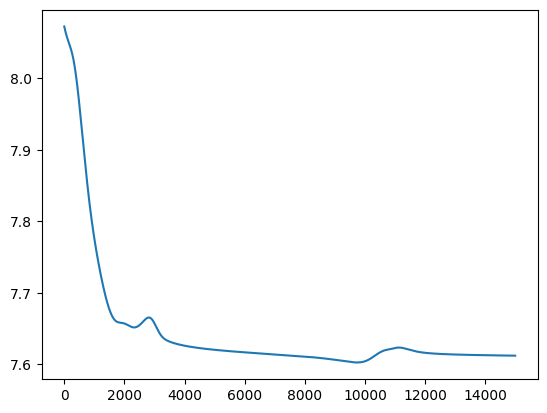

In [578]:
w_1, b_1, w_2, b_2, error_list = NN(X, y, n_x, n_h, n_y, alpha, 15000)
plt.plot(range(len(error_list)), error_list)



In [581]:
# execute over to predict 
z1 = np.dot(w_1, X_test.T) + b_1
a1 = g1(z1)
z2 = np.dot(w_2, a1) + b_2
a2 = g2(z2.T).T
pred = np.argmax(a2, axis=0)
 



# build confusion matrix
labels = np.argmax(y_test,axis=1)
print(labels.shape)
NN1_cm = confusion_matrix(labels, pred)
print(NN1_cm) 

print(y_test.shape,pred.shape)
acc_NN_1 = accuracy_score(labels, pred)
print('Accuracy: {:.2f}'.format(acc_NN_1))

(503,)
[[  0   0   0 137]
 [  0   0   0 118]
 [  0   0   0 122]
 [  0   0   0 126]]
(503, 4) (503,)
Accuracy: 0.25


In [582]:
print(classification_report(labels, pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00       118
           2       0.00      0.00      0.00       122
           3       0.25      1.00      0.40       126

    accuracy                           0.25       503
   macro avg       0.06      0.25      0.10       503
weighted avg       0.06      0.25      0.10       503



In [583]:
# try with ReLU
# ReLU
def ReLU(t):
    return t * (t > 0)  

In [584]:
def NN(X, y, n_x, n_h, n_y, alpha, iterations):
    w_1 = np.random.randn(n_h, n_x)
    b_1 = np.zeros((n_h, 1))
    w_2 = np.random.randn(n_y, n_h)
    b_2 = np.zeros((n_y, 1)) 
    error_list = []
    for i in range(iterations):
        # Forward Prop
        z_1 = np.dot(w_1, X) + b_1
        a_1 = g1(z_1)
        z_2 = np.dot(w_2, a_1) + b_2
        a_2 = ReLU(z_2) 
        # Back Prop
        dz_2 = a_2 - y 
        dw_2 = np.dot(dz_2, a_1.T)/m
        db_2 = np.sum(dz_2, axis=1, keepdims=True)/m
        dz_1 = np.dot(w_2.T, dz_2) * g1_prime(z_1)
        dw_1 = np.dot(dz_1, X.T)/m
        db_1 = np.sum(dz_1, axis=1, keepdims=True)/m
        w_2 -= alpha * dw_2
        b_2 -= alpha * db_2
        w_1 -= alpha * dw_1
        b_1 -= alpha * db_1
        error = -1.0/m * np.sum(
              np.sum(y*np.log(a_2)) + 
              np.sum((1-y)*np.log(1-a_2))
           )
        error_list.append(error)
    return w_1, b_1, w_2, b_2, error_list

In [587]:
w_1, b_1, w_2, b_2, error_list = NN(X, y, n_x, n_h, n_y, alpha, 15000) 
 
# execute over to predict 
z1 = np.dot(w_1, X_test.T) + b_1
a1 = g1(z1)
z2 = np.dot(w_2, a1) + b_2
a2 = g2(z2.T).T
pred = np.argmax(a2, axis=0)
print(pred.shape) 



# build confusion matrix
labels = np.argmax(y_test,axis=1)
print(labels.shape)
NN2_cm = confusion_matrix(labels, pred)
print(NN2_cm) 

print(y_test.shape,pred.shape)
acc_NN_2 = accuracy_score(labels, pred)
print('Accuracy: {:.2f}'.format(acc_NN_2))


(503,)
(503,)
[[ 29   5  50  53]
 [ 25  11  58  24]
 [ 13   2  76  31]
 [  9   1   9 107]]
(503, 4) (503,)
Accuracy: 0.44


3. Neural Network using Scikit-learn:
Use MLPClassifier class of the scikit-learn library to implement a neural network model with 2 layers.
• Train the model on the preprocessed dataset.
• Repeat with three layers.
• Investigate how the accuracy of the two-layer neural network model varies with the number of neurons in each hidden layer.
• Plot a graph with the number of neurons on the X-axis and the corresponding accuracy on the Y-axis.
• Provide a brief analysis of how the number of neurons in the hidden layers affects the model's performance. Consider discussing any trends, optimal neuron counts, and possible reasons for the observed performance changes.

In [588]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,12,8), max_iter = 2000,activation = 'relu', solver = 'adam')
mlp_clf

MLPClassifier(hidden_layer_sizes=(16, 12, 8), max_iter=2000)

In [589]:
print(X_train.shape)
print(y_train.shape)
# fit the model 
mlp_clf.fit(X_train, y_train)

(2011, 37)
(2011, 4)


MLPClassifier(hidden_layer_sizes=(16, 12, 8), max_iter=2000)

In [590]:
y_pred = mlp_clf.predict(X_test)
print(y_test.shape,y_pred.shape)
acc_MLPClassifier = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(acc_MLPClassifier))
 
pred = np.argmax(y_pred.T, axis=0)
labels = np.argmax(y_test,axis=1)
MLPClassifier_cm = confusion_matrix(labels, pred)
print(MLPClassifier_cm) 

(503, 4) (503, 4)
Accuracy: 0.35
[[95 10 15 17]
 [71  9 23 15]
 [38  3 58 23]
 [46  2  2 76]]


In [591]:
# number of neurons 
nueList = [2,5,10,15,20,25]
plt_arry = []
for i in nueList:
    mlp_clf = MLPClassifier(hidden_layer_sizes=(16,i,8), max_iter = 2000,activation = 'relu', solver = 'adam')
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred); 
    print('Accuracy: '+ str(acc)+', number of neurons: '+str(i))
    plt_arry.append([acc])

Accuracy: 0.32007952286282304, number of neurons: 2
Accuracy: 0.33001988071570576, number of neurons: 5
Accuracy: 0.3558648111332008, number of neurons: 10
Accuracy: 0.35984095427435386, number of neurons: 15
Accuracy: 0.37773359840954274, number of neurons: 20
Accuracy: 0.33399602385685884, number of neurons: 25


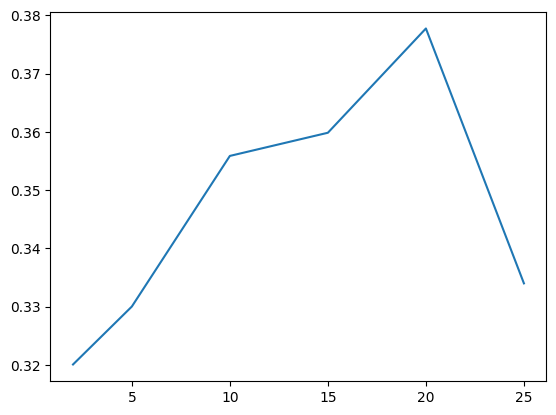

In [592]:
plt.plot(nueList, plt_arry)

4. Logistic Regression Implementation:
• Implement a logistic regression model using scikit-learn as a baseline for comparison.
• Train the model on the same preprocessed dataset. 

In [594]:
#  Create Logistic Regression
ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')
# Train One-Vs-Rest Logistic Regression
ovr.fit(X_train, np.argmax(y_train,axis=1))
y_predict =ovr.predict(X_test)

# add up the predictions  
ovr_cm= metrics.confusion_matrix(np.argmax(y_test,axis=1), y_predict)
print(ovr_cm)

 
print(y_test.shape,pred.shape)
acc_ovr = accuracy_score(np.argmax(y_test,axis=1), y_predict)
print('Accuracy: {:.2f}'.format(acc_ovr))


[[58 23 28 28]
 [33 24 41 20]
 [11  9 75 27]
 [26  8  3 89]]
(503, 4) (503,)
Accuracy: 0.49


Summary: 

In [595]:
# Neural Network using Scikit-learn: from scratch method 1
print("acc:", acc_NN_1)
print(NN1_cm)

acc: 0.2504970178926441
[[  0   0   0 137]
 [  0   0   0 118]
 [  0   0   0 122]
 [  0   0   0 126]]


In [596]:
# Neural Network using Scikit-learn: from scratch  method 2 > changing ReLU
print("acc:", acc_NN_2)
print(NN2_cm)

acc: 0.4433399602385686
[[ 29   5  50  53]
 [ 25  11  58  24]
 [ 13   2  76  31]
 [  9   1   9 107]]


[2, 5, 10, 15, 20, 25]
[[0.32007952286282304], [0.33001988071570576], [0.3558648111332008], [0.35984095427435386], [0.37773359840954274], [0.33399602385685884]]


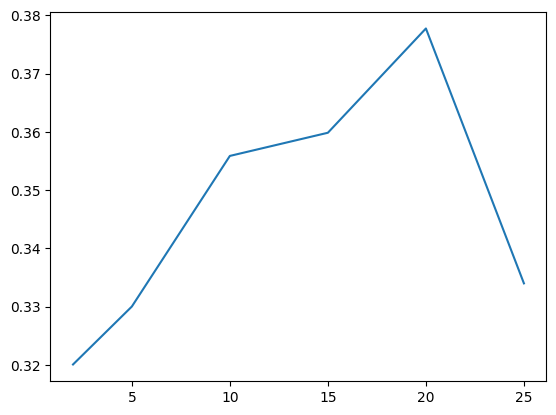

In [610]:
# Neural Network using Scikit-learn:
print(nueList)
print(plt_arry)
plt.plot(nueList, plt_arry)

In [597]:
# Logistic Regression Implementation
print("acc:", acc_MLPClassifier)
print(MLPClassifier_cm)

acc: 0.34791252485089463
[[95 10 15 17]
 [71  9 23 15]
 [38  3 58 23]
 [46  2  2 76]]
